In [139]:
#importing the relevant libraries
import os 
import folium
import seaborn as sns
import geopandas as gpd
import pandas as pd
import palettable as pltt
from seaborn import palplot
import osmnx as ox
import libpysal
import numpy as np
from pysal.lib import weights
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from scipy.stats import linregress
from pysal.explore import esda
from libpysal.io import open as psopen


%matplotlib inline
ox.settings.log_console=True
ox.settings.use_cache=True

In [140]:
# Check for content in downloaded folder data
path = 'data/'
os.listdir(path)

['.ipynb_checkpoints',
 'ark_verzamelformulier.csv',
 'ark_verzamelformulier_aangepaste kolommen.csv',
 'duikdata_gecombineed_p2.csv',
 'KBS0301-v1.53.csv',
 'paaldiameters_ark_score_uit_hm.csv']

In [141]:
#loading the csv file of interest 
f = path
ARKD = pd.read_csv(f + 'ark_verzamelformulier.csv')
ARKD 


,Unnamed: 0,trace,batch,objecttype,aantal doorsneden tpv het rak,fundatie materiaal,onderbouw materiaal,bovenbouw materiaal,afwijkend objecttype,grachtnaam,...,aanwijzing meest kritische onderdeel,gevolgscore functie,kansscore toestand,kansscore toestand obv specialist,risicoscore specialist,beoordeling specialist,actuele status/vervolg rak,rak,rakdeel,geometrie
0,ACG0101-A,9.0,3.0,Kademuur,3.0,Hout,Hout,Metselwerk (baksteen),Nee,Achtergracht,...,palen (draagkracht),2.666667,2.333333,3.0,8.000000,Hoog,TAK Prio / Veiligheidsmaatregelen,ACG0101,A,"LINESTRING (121891.280999999 486047.239999998, 121925 486058.015999999, 121976.05705315756 486074.33281843475)"
1,ACG0101-B,9.0,3.0,Kademuur,3.0,Hout,Hout,Metselwerk (baksteen),Nee,Achtergracht,...,palen (draagkracht),2.333333,2.333333,3.0,7.000000,Gemiddeld,TAK / Veiligheidsmaatregelen,ACG0101,B,"LINESTRING (121976.05705315756 486074.33281843475, 121978.442000002 486075.094999999, 121983.28064860268 486075.36587041995)"
2,ACG0101-C,9.0,3.0,Kademuur,3.0,Hout,Hout,Metselwerk (baksteen),Nee,Achtergracht,...,onbekend,2.666667,2.166667,3.0,8.000000,Hoog,TAK Prio / Veiligheidsmaatregelen,ACG0101,C,"LINESTRING (121983.28064860268 486075.36587041995, 121983.800999999 486075.395, 121983.907000002 486075.399, 121984.032000002 486075.397999998, 121984.157000002 486075.390999999, 121984.280999999 486075.377999999, 121984.403999999 486075.359000001, 121984.526999999 486075.333999999, 121984.647999998 486075.302999999, 121984.767000001 486075.265999999, 121984.885000002 486075.223999999, 121985 486075.175999999, 121985.113000002 486075.123, 121985.223000001 486075.063999999, 121985.331 486075, 121985.434999999 486074.931000002, 121985.535 486074.857000001, 121985.631999999 486074.778999999, 121985.726 486074.695, 121985.815000001 486074.607999999, 121985.899 486074.515999999, 121985.978999998 486074.420000002, 121986.055 486074.320999999, 121986.125999998 486074.217999998, 121986.191 486074.112, 121986.25178544901 486074.0023868952)"
3,ACG0103-A,9.0,3.0,Kademuur,3.0,Hout,Hout,Metselwerk (baksteen),Nee,Achtergracht,...,palen (draagkracht),2.333333,2.333333,3.0,7.000000,Gemiddeld,TAK / Veiligheidsmaatregelen,ACG0103,A,"LINESTRING (121990.532000002 486059.761999998, 121990.570999999 486059.629000001, 121990.598000001 486059.513, 121990.618999999 486059.395, 121990.635000002 486059.276999999, 121990.644000001 486059.158, 121990.647999998 486059.037999999, 121990.645 486058.919, 121990.636999998 486058.800000001, 121990.622000001 486058.682, 121990.602000002 486058.563999999, 121990.574999999 486058.447999999, 121990.543000001 486058.333000001, 121990.504999999 486058.219000001, 121990.462000001 486058.107999999, 121990.412999999 486057.999000002, 121990.357999999 486057.892999999, 121990.298999999 486057.789999999, 121990.234000001 486057.690000001, 121990.164000001 486057.592999998, 121990.09 486057.499000002, 121990.010000002 486057.41, 121989.927000001 486057.324999999, 121989.839000002 486057.243999999, 121989.747000001 486057.166999999, 121989.651999999 486057.096000001, 121989.552999999 486057.028999999, 121989.451000001 486056.967, 121989.23069776966 486056.833408385)"
4,ACG0103-B,9.0,3.0,Kademuur,3.0,Hout,Hout,Metselwerk (baksteen),Nee,Achtergracht,...,palen (draagkracht),2.333333,2.166667,3.0,7.000000,Gemiddeld,TAK / Veiligheidsmaatregelen,ACG0103,B,"LINESTRING (121989.23069776966 486056.833408385, 121984.296 486053.840999998, 121968.38529940773 486048.9045935153)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,WSG0202-A,2.0,NaN,Kademuur,3.0,Hout,Beton,Beton met basalt,Nee,Westlandgracht,...,palen (hout),1.000000,1.833333,2.0,2.000000,Gemiddeld,Beheer,WSG0202,A,"LINESTRING (118241.122000001 485410.919, 118224.61203474054 485410.9528688342)"
644,WSG0202-B,2.0,NaN,Kademuur,3.0,Hout,Beton,Beton met basalt,Nee,Westlandgracht,...,geen,1.333333,1.166667,2.0,2.666667,Gemiddeld,TAK / Veiligheidsmaatregelen,WSG0202,B,"LINESTRING (118224.61203474054 485410.95

In [142]:
row_180 = ARKD.iloc[180]
row_180



Unnamed: 0                                                                                                                                                       PRG0401
trace                                                                                                                                                               12.0
batch                                                                                                                                                                  -
objecttype                                                                                                                                                      Kademuur
aantal doorsneden tpv het rak                                                                                                                                        1.0
                                                                                                  ...                                                      

In [143]:
first_ten_columns = ARKD.iloc[:, :10]  # Selecting all rows and the first ten columns
first_ten_columns

,Unnamed: 0,trace,batch,objecttype,aantal doorsneden tpv het rak,fundatie materiaal,onderbouw materiaal,bovenbouw materiaal,afwijkend objecttype,grachtnaam
0,ACG0101-A,9.0,3.0,Kademuur,3.0,Hout,Hout,Metselwerk (baksteen),Nee,Achtergracht
1,ACG0101-B,9.0,3.0,Kademuur,3.0,Hout,Hout,Metselwerk (baksteen),Nee,Achtergracht
2,ACG0101-C,9.0,3.0,Kademuur,3.0,Hout,Hout,Metselwerk (baksteen),Nee,Achtergracht
3,ACG0103-A,9.0,3.0,Kademuur,3.0,Hout,Hout,Metselwerk (baksteen),Nee,Achtergracht
4,ACG0103-B,9.0,3.0,Kademuur,3.0,Hout,Hout,Metselwerk (baksteen),Nee,Achtergracht
...,...,...,...,...,...,...,...,...,...,...
643,WSG0202-A,2.0,NaN,Kademuur,3.0,Hout,Beton,Beton met basalt,Nee,Westlandgracht
644,WSG0202-B,2.0,NaN,Kademuur,3.0,Hout,Beton,Beton met basalt,Nee,Westlandgracht
645,WSG0202-C,2.0,NaN,Kademuur,3.0,Hout,Beton,Beton,Ja,Westlandgracht
646,HEG0202-B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
# rename of column'Unnamed: 0' naar 'Quaywall nr'
ARKD.rename(columns={'Unnamed: 0': 'Quaywall nr'}, inplace=True)

ARKD


,Quaywall nr,trace,batch,objecttype,aantal doorsneden tpv het rak,fundatie materiaal,onderbouw materiaal,bovenbouw materiaal,afwijkend objecttype,grachtnaam,...,aanwijzing meest kritische onderdeel,gevolgscore functie,kansscore toestand,kansscore toestand obv specialist,risicoscore specialist,beoordeling specialist,actuele status/vervolg rak,rak,rakdeel,geometrie
0,ACG0101-A,9.0,3.0,Kademuur,3.0,Hout,Hout,Metselwerk (baksteen),Nee,Achtergracht,...,palen (draagkracht),2.666667,2.333333,3.0,8.000000,Hoog,TAK Prio / Veiligheidsmaatregelen,ACG0101,A,"LINESTRING (121891.280999999 486047.239999998, 121925 486058.015999999, 121976.05705315756 486074.33281843475)"
1,ACG0101-B,9.0,3.0,Kademuur,3.0,Hout,Hout,Metselwerk (baksteen),Nee,Achtergracht,...,palen (draagkracht),2.333333,2.333333,3.0,7.000000,Gemiddeld,TAK / Veiligheidsmaatregelen,ACG0101,B,"LINESTRING (121976.05705315756 486074.33281843475, 121978.442000002 486075.094999999, 121983.28064860268 486075.36587041995)"
2,ACG0101-C,9.0,3.0,Kademuur,3.0,Hout,Hout,Metselwerk (baksteen),Nee,Achtergracht,...,onbekend,2.666667,2.166667,3.0,8.000000,Hoog,TAK Prio / Veiligheidsmaatregelen,ACG0101,C,"LINESTRING (121983.28064860268 486075.36587041995, 121983.800999999 486075.395, 121983.907000002 486075.399, 121984.032000002 486075.397999998, 121984.157000002 486075.390999999, 121984.280999999 486075.377999999, 121984.403999999 486075.359000001, 121984.526999999 486075.333999999, 121984.647999998 486075.302999999, 121984.767000001 486075.265999999, 121984.885000002 486075.223999999, 121985 486075.175999999, 121985.113000002 486075.123, 121985.223000001 486075.063999999, 121985.331 486075, 121985.434999999 486074.931000002, 121985.535 486074.857000001, 121985.631999999 486074.778999999, 121985.726 486074.695, 121985.815000001 486074.607999999, 121985.899 486074.515999999, 121985.978999998 486074.420000002, 121986.055 486074.320999999, 121986.125999998 486074.217999998, 121986.191 486074.112, 121986.25178544901 486074.0023868952)"
3,ACG0103-A,9.0,3.0,Kademuur,3.0,Hout,Hout,Metselwerk (baksteen),Nee,Achtergracht,...,palen (draagkracht),2.333333,2.333333,3.0,7.000000,Gemiddeld,TAK / Veiligheidsmaatregelen,ACG0103,A,"LINESTRING (121990.532000002 486059.761999998, 121990.570999999 486059.629000001, 121990.598000001 486059.513, 121990.618999999 486059.395, 121990.635000002 486059.276999999, 121990.644000001 486059.158, 121990.647999998 486059.037999999, 121990.645 486058.919, 121990.636999998 486058.800000001, 121990.622000001 486058.682, 121990.602000002 486058.563999999, 121990.574999999 486058.447999999, 121990.543000001 486058.333000001, 121990.504999999 486058.219000001, 121990.462000001 486058.107999999, 121990.412999999 486057.999000002, 121990.357999999 486057.892999999, 121990.298999999 486057.789999999, 121990.234000001 486057.690000001, 121990.164000001 486057.592999998, 121990.09 486057.499000002, 121990.010000002 486057.41, 121989.927000001 486057.324999999, 121989.839000002 486057.243999999, 121989.747000001 486057.166999999, 121989.651999999 486057.096000001, 121989.552999999 486057.028999999, 121989.451000001 486056.967, 121989.23069776966 486056.833408385)"
4,ACG0103-B,9.0,3.0,Kademuur,3.0,Hout,Hout,Metselwerk (baksteen),Nee,Achtergracht,...,palen (draagkracht),2.333333,2.166667,3.0,7.000000,Gemiddeld,TAK / Veiligheidsmaatregelen,ACG0103,B,"LINESTRING (121989.23069776966 486056.833408385, 121984.296 486053.840999998, 121968.38529940773 486048.9045935153)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,WSG0202-A,2.0,NaN,Kademuur,3.0,Hout,Beton,Beton met basalt,Nee,Westlandgracht,...,palen (hout),1.000000,1.833333,2.0,2.000000,Gemiddeld,Beheer,WSG0202,A,"LINESTRING (118241.122000001 485410.919, 118224.61203474054 485410.9528688342)"
644,WSG0202-B,2.0,NaN,Kademuur,3.0,Hout,Beton,Beton met basalt,Nee,Westlandgracht,...,geen,1.333333,1.166667,2.0,2.666667,Gemiddeld,TAK / Veiligheidsmaatregelen,WSG0202,B,"LINESTRING (118224.61203474054 485410.9

In [145]:
import pandas as pd

# Get all column names and dsiplaying them
column_names = ARKD.columns

print(column_names)


Index(['Quaywall nr', 'trace', 'batch', 'objecttype',
       'aantal doorsneden tpv het rak', 'fundatie materiaal',
       'onderbouw materiaal', 'bovenbouw materiaal', 'afwijkend objecttype',
       'grachtnaam',
       ...
       'aanwijzing meest kritische onderdeel', 'gevolgscore functie',
       'kansscore toestand', 'kansscore toestand obv specialist',
       'risicoscore specialist', 'beoordeling specialist',
       'actuele status/vervolg rak', 'rak', 'rakdeel', 'geometrie'],
      dtype='object', length=154)


In [146]:
import geopandas as gpd
import pandas as pd

pd.set_option('display.max_colwidth', None) 

filtered_gdf = ARKD[ARKD['Quaywall nr'] == 'AMS0204-A']

# Select only the necessary columns 
coordinates_df = filtered_gdf[['Quaywall nr', 'geometrie']]

# Convert the GeoDataFrame to a pandas DataFrame
coordinates_df = pd.DataFrame(coordinates_df)

# Display the pandas DataFrame
coordinates_df



,Quaywall nr,geometrie
6,AMS0204-A,"LINESTRING (121848.078000002 486610.011999998, 121847.546 486611.388, 121846.441 486611.561999999, 121845.357000001 486611.833999999, 121844.300999999 486612.202, 121843.282000002 486612.662, 121842.309 486613.212000001, 121841.388 486613.846999999, 121840.528000001 486614.561000001, 121839.734999999 486615.348999999, 121839.015000001 486616.204999998, 121838.375 486617.122000001, 121838.372000001 486617.127, 121834.473999999 486623.943, 121833.940000001 486625, 121831.368000001 486630.671, 121830.971999999 486631.522, 121830.502 486632.335000001, 121829.960999999 486633.103, 121829.353999998 486633.818999998, 121828.684999999 486634.478, 121827.960000001 486635.074000001, 121827.184999999 486635.603, 121826.908 486635.769000001, 121775.65697265729 486665.35908820265)"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Columns: 154 entries, Quaywall nr to geometrie
dtypes: float64(74), object(80)
memory usage: 779.8+ KB


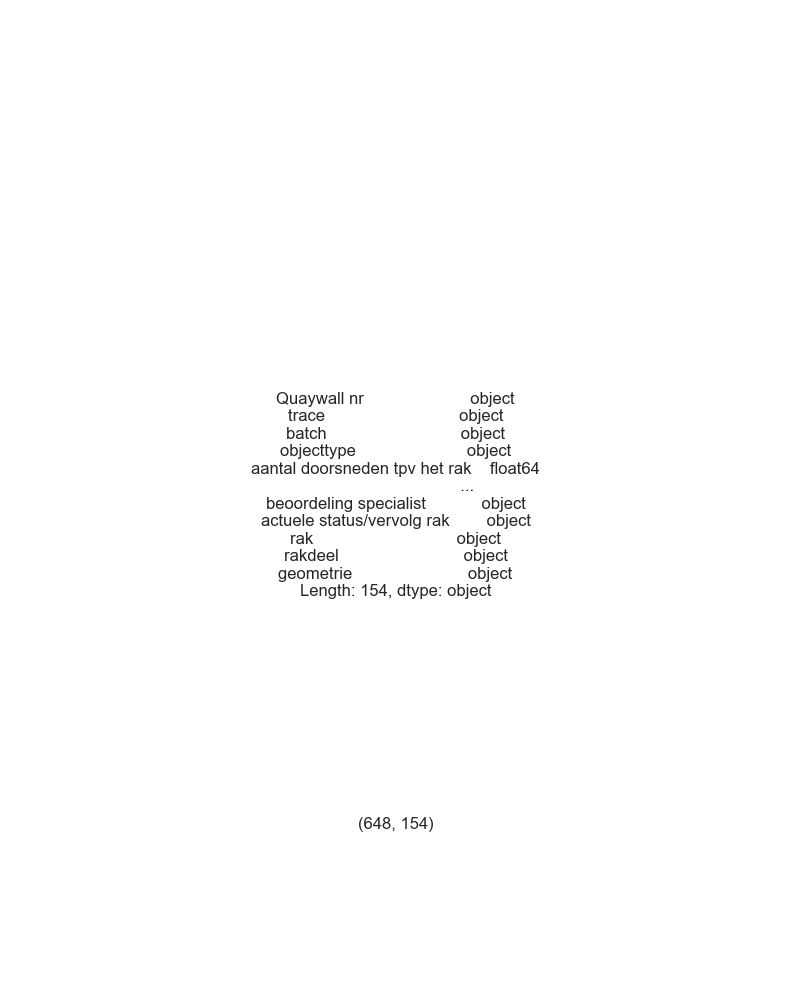

In [147]:


# Capture the output of ARKD.info(), ARKD.dtypes, and ARKD.shape
info_output = ARKD.info()
dtypes_output = ARKD.dtypes
shape_output = ARKD.shape

fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Plot ARKD.info()
axs[0].text(0.5, 0.5, info_output, fontsize=12, ha='center', va='center', wrap=True)
axs[0].axis('off')

# Plot ARKD.dtypes
axs[1].text(0.5, 0.5, str(dtypes_output), fontsize=12, ha='center', va='center', wrap=True)
axs[1].axis('off')

# Plot ARKD.shape
axs[2].text(0.5, 0.5, str(shape_output), fontsize=12, ha='center', va='center', wrap=True)
axs[2].axis('off')

# Adjust layout
plt.tight_layout()

# Save the figure as a PNG file and create a plot
plt.savefig('ARKD_info.png')
plt.show()


In [148]:
ARKD.dtypes

Quaywall nr                       object
trace                             object
batch                             object
objecttype                        object
aantal doorsneden tpv het rak    float64
                                  ...   
beoordeling specialist            object
actuele status/vervolg rak        object
rak                               object
rakdeel                           object
geometrie                         object
Length: 154, dtype: object

In [149]:
# checking dataframe shape
ARKD.shape

(648, 154)

In [150]:
# analysing soem descriptive features of the dataframe
ARKD.describe()

,aantal doorsneden tpv het rak,bouwjaar,kade score1,afstand rijbaan tot kademuur,routescore2,kritieke leiding score3,score maaiveld algemeen,gevolgscore water,bovenkant deksteen(m NAP),bovenkant vloer(m NAP),...,kansscore,kans X gevolg,afgerond,staat onderbouw score1,staat bovenbouw score2,slechtste score,gevolgscore functie,kansscore toestand,kansscore toestand obv specialist,risicoscore specialist
count,644.000000,383.000000,642.000000,631.000000,635.000000,642.000000,642.000000,642.000000,642.000000,642.000000,...,644.000000,642.000000,642.000000,640.000000,641.000000,641.000000,642.000000,644.000000,641.000000,641.000000
mean,3.669255,1935.861619,2.873832,4.903819,-0.110236,0.532710,3.292835,1.979751,0.946486,-1.020561,...,1.925939,4.360839,4.401869,2.425000,1.864275,2.497660,2.239356,1.925939,2.497660,5.652106
std,2.252543,56.844365,0.458547,6.769933,0.313431,0.499318,0.727172,0.739710,0.513500,0.465652,...,0.493538,1.496362,1.502114,0.994822,0.809313,0.974877,0.412991,0.493538,0.974877,2.523596
min,1.000000,1425.000000,1.000000,0.000000,-1.000000,0.000000,1.000000,1.000000,0.100000,-4.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1902.500000,3.000000,2.500000,0.000000,0.000000,3.000000,1.000000,0.550000,-1.107500,...,1.500000,3.208333,3.000000,2.000000,1.000000,2.000000,2.000000,1.500000,2.000000,3.333333
50%,3.000000,1946.000000,3.000000,3.600000,0.000000,1.000000,3.000000,2.000000,0.840000,-1.000000,...,2.000000,4.354167,4.000000,3.000000,2.000000,3.000000,2.333333,2.000000,3.000000,6.000000
75%,5.000000,1977.500000,3.000000,4.700000,0.000000,1.000000,4.000000,3.000000,1.300000,-0.700000,...,2.333333,5.444444,5.000000,3.000000,2.000000,3.000000,2.666667,2.333333,3.000000,8.000000
max,10.000000,2018.000000,4.000000,75.000000,0.000000,1.000000,4.000000,3.000000,3.060000,0.570000,...,3.142857,9.000000,9.000000,4.000000,4.000000,4.000000,3.666667,3.142857,4.000000,12.000000


In [151]:
#Creating an overview of the column names in the dataset 
column_names = ARKD.columns.tolist()
column_names

['Quaywall nr',
 'trace',
 'batch',
 'objecttype',
 'aantal doorsneden tpv het rak',
 'fundatie materiaal',
 'onderbouw materiaal',
 'bovenbouw materiaal',
 'afwijkend objecttype',
 'grachtnaam',
 'straatnaam',
 'stadsdeel',
 'bouwjaar bekend?',
 'bouwjaar',
 'leeftijd',
 'lengte GIS',
 'afstand tov gevel',
 'tekeningen?',
 'bestek?',
 'constructieve berekening?',
 'inspectie rapport bovenwater?',
 'inspectie rapport onderwater?',
 'materiaal onderzoek palen?',
 'bathymetrie aanwezig?',
 'satellietmeting beschikbaar?',
 'monitoringsdata beschikbaar?',
 'bomen aanwezig (D>15cm)?',
 'afmeervoorziening aanwezig?',
 'woonboten aanwezig?',
 'verkeer aanwezig?',
 'parkeervakken aanwezig?',
 'functie maaiveld',
 'kade score1',
 'afstand rijbaan tot kademuur',
 'routescore2',
 'kritieke leiding',
 'kritieke leiding score3',
 'score maaiveld algemeen',
 'beoordeling maaiveld',
 'afmeervoorziening?',
 'woonboten?',
 'gevolgscore water',
 'beoordeling water',
 'bovenkant deksteen(m NAP)',
 'boven

In [152]:
#creating a subset for the variables of interest

input_columns = ['Quaywall nr', 'onderbouw materiaal','fundatie materiaal',
 'bovenbouw materiaal', 'maximale verplaatsingssnelheid hor (mm/mnd)', 'maximale verplaatsingssnelheid vert (mm/mnd)','leeftijd', 'lengte GIS','geometrie', 'rak','rakdeel','aantasting houten palen','aantasting houten palen score1','beschadigde kesp', 'beschadigde kesp score3','beschadigde paal-kesp/paal-vloer','paal-kesp/paal-vloer score4','risicoscore specialist']  
ARKDSS = ARKD[input_columns]
plt.savefig('ARKDSS.png')
ARKDSS
ARKDSS.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Quaywall nr                                   648 non-null    object 
 1   onderbouw materiaal                           638 non-null    object 
 2   fundatie materiaal                            635 non-null    object 
 3   bovenbouw materiaal                           640 non-null    object 
 4   maximale verplaatsingssnelheid hor (mm/mnd)   248 non-null    float64
 5   maximale verplaatsingssnelheid vert (mm/mnd)  248 non-null    float64
 6   leeftijd                                      644 non-null    object 
 7   lengte GIS                                    642 non-null    object 
 8   geometrie                                     616 non-null    object 
 9   rak                                           644 non-null    obj

<Figure size 640x480 with 0 Axes>

       maximale verplaatsingssnelheid hor (mm/mnd)  \
count                                   248.000000   
mean                                      0.577433   
std                                       0.852227   
min                                       0.000000   
25%                                       0.155231   
50%                                       0.333333   
75%                                       0.720899   
max                                       6.000000   

       maximale verplaatsingssnelheid vert (mm/mnd)  aantasting houten palen  \
count                                    248.000000               504.000000   
mean                                       0.264662                56.746693   
std                                        0.579612                38.306058   
min                                        0.000000                 0.000000   
25%                                        0.072403                17.000000   
50%                              

<Figure size 2000x1400 with 0 Axes>

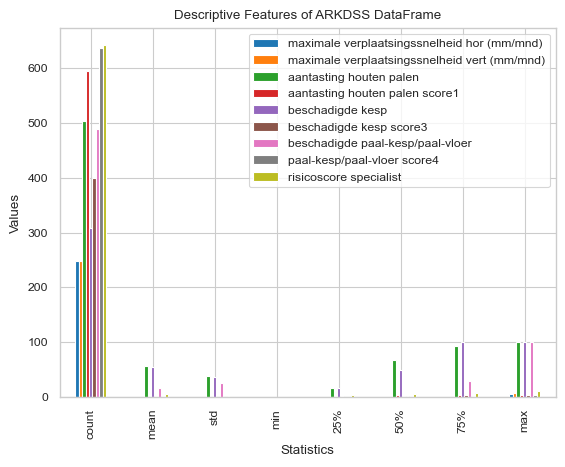

In [153]:

import matplotlib.pyplot as plt

# Analyzing descriptive features of the DataFrame
description = ARKDSS.describe()
print(description)

# Saving the description plot as an image
plt.figure(figsize=(20, 14))  
description.plot(kind='bar')  
plt.title('Descriptive Features of ARKDSS DataFrame')  
plt.xlabel('Statistics')  
plt.ylabel('Values')  
plt.savefig('ARKDSS.describe.png')  
plt.show()  

C:\Users\kenter013\AppData\Local\Temp\ipykernel_30608\1688144449.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cividis')


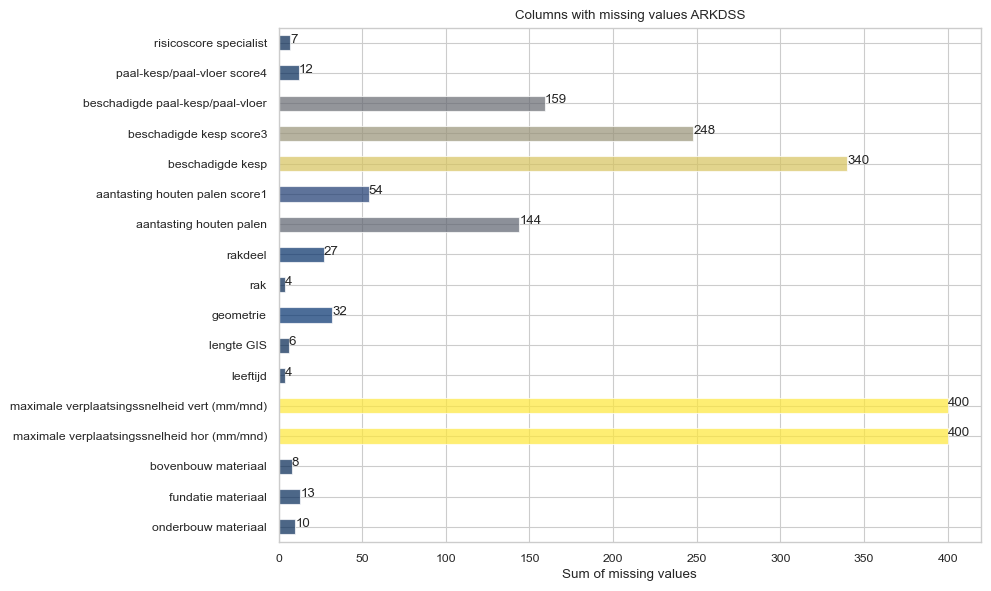

In [154]:

import matplotlib.cm as cm

# subset of data with missing values > 1 and creating plots
missing_values_per_column_ARKDSS = ARKDSS.isnull().sum()
missing_values_above_15_ARKDSS = missing_values_per_column_ARKDSS[missing_values_per_column_ARKDSS > 1]

plt.figure(figsize=(10, 6))

cmap = cm.get_cmap('cividis')

norm = plt.Normalize(vmin=missing_values_above_15_ARKDSS.min(), vmax=missing_values_above_15_ARKDSS.max())

colors = [cmap(norm(value)) for value in missing_values_above_15_ARKDSS]

missing_values_above_15_ARKDSS.plot(kind='barh', color=colors, alpha=0.7) 
plt.xlabel('Sum of missing values')
plt.title('Columns with missing values ARKDSS')

for index, value in enumerate(missing_values_above_15_ARKDSS):
    plt.text(value, index, str(value))

plt.tight_layout()  
plt.savefig('missing_values_plot_ARKDSS.png')  
plt.show()


C:\Users\kenter013\AppData\Local\Temp\ipykernel_30608\3690470035.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  valid_values_per_column = ARKDSS_cleaned.applymap(is_valid).sum()
C:\Users\kenter013\AppData\Local\Temp\ipykernel_30608\3690470035.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cividis')


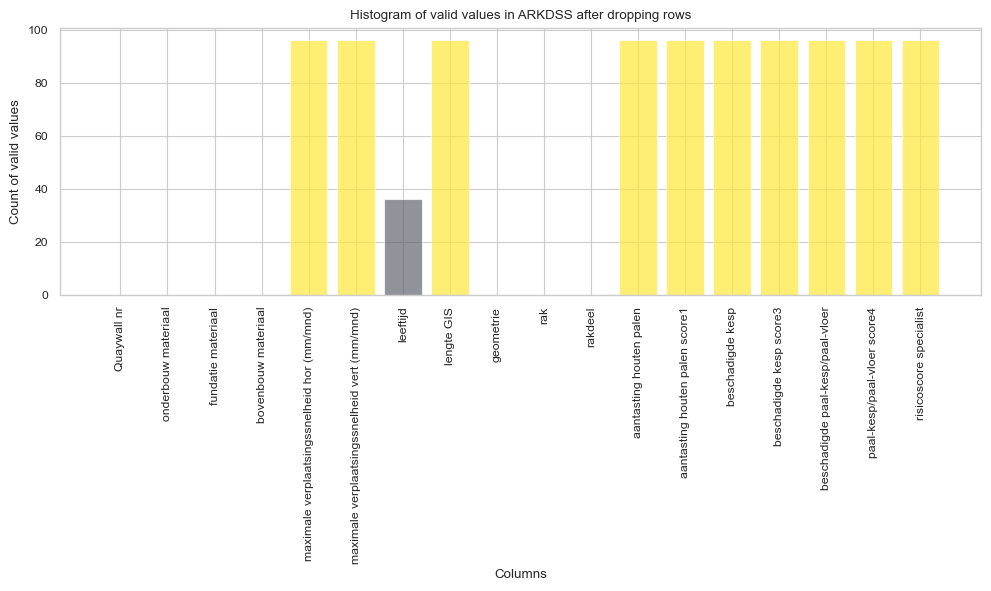

shape of the data frame : (96, 18)
leeftijd
>120      53
120.0      5
80-120     4
110.0      3
128.0      3
?          2
132.0      2
77.0       2
130        1
125        1
132        1
121.0      1
141.0      1
< 40       1
157.0      1
130.0      1
126        1
115.0      1
120        1
162        1
134.0      1
126.0      1
39         1
122.0      1
90         1
139.0      1
138.0      1
131.0      1
129.0      1
35.0       1
Name: count, dtype: int64


In [155]:

# Remove missing values from the DataFrame
ARKDSS_cleaned = ARKDSS.dropna()

# check for valid values
def is_valid(value):
    try:
        # Check if the value is numeric 
        float(value)
        return True
    except ValueError:
        return False

# Count valid values per column after removing missing values
valid_values_per_column = ARKDSS_cleaned.applymap(is_valid).sum()

#plotting

plt.figure(figsize=(10, 6))

cmap = cm.get_cmap('cividis')

# Normalize the data for color consistency
norm = plt.Normalize(vmin=valid_values_per_column.min(), vmax=valid_values_per_column.max())

colors = [cmap(norm(value)) for value in valid_values_per_column]

# Plot the histogram
plt.bar(valid_values_per_column.index, valid_values_per_column, color=colors, alpha=0.7)

plt.xlabel('Columns')
plt.ylabel('Count of valid values')
plt.title('Histogram of valid values in ARKDSS after dropping rows')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()  
plt.savefig('valid_values_histogram_ARKDSS.png')  
plt.show()

print("shape of the data frame :", ARKDSS_cleaned.shape)

unique_values_info = ARKDSS_cleaned['leeftijd'].value_counts()
print(unique_values_info)



       maximale verplaatsingssnelheid hor (mm/mnd)  \
count                                    96.000000   
mean                                      0.712822   
std                                       0.730017   
min                                       0.000000   
25%                                       0.297705   
50%                                       0.604348   
75%                                       0.869949   
max                                       6.000000   

       maximale verplaatsingssnelheid vert (mm/mnd)  aantasting houten palen  \
count                                     96.000000                96.000000   
mean                                       0.302593                80.795139   
std                                        0.420498                25.492500   
min                                        0.000000                 0.000000   
25%                                        0.111111                71.000000   
50%                              

<Figure size 1000x600 with 0 Axes>

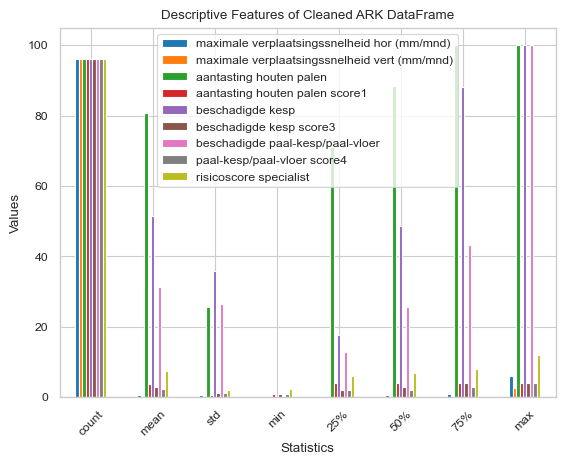

In [156]:

# Analyzing descriptive features of the DataFrame
description = ARKDSS_cleaned.describe()
print(description)

# Plotting and saving the description plot 
plt.figure(figsize=(10, 6))  
ax = description.plot(kind='bar')  
plt.title('Descriptive Features of Cleaned ARK DataFrame')  
plt.xlabel('Statistics')  
plt.ylabel('Values')  
plt.xticks(rotation=45)  
plt.savefig('ARKDSS_Cleaned.describe.png')
plt.show()  

C:\Users\kenter013\AppData\Local\Temp\ipykernel_30608\969035028.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ARKDSS_cleaned['leeftijd'] = ARKDSS_cleaned['leeftijd'].apply(extract_numeric)


leeftijd
120.0    6
80.0     4
128.0    3
110.0    3
132.0    3
77.0     2
130.0    2
126.0    2
115.0    1
121.0    1
141.0    1
157.0    1
125.0    1
134.0    1
162.0    1
39.0     1
122.0    1
90.0     1
139.0    1
138.0    1
131.0    1
129.0    1
35.0     1
Name: count, dtype: int64
Basic Statistics for 'leeftijd' column:
count     40.000000
mean     114.850000
std       27.563958
min       35.000000
25%      110.000000
50%      121.500000
75%      130.250000
max      162.000000
Name: leeftijd, dtype: float64


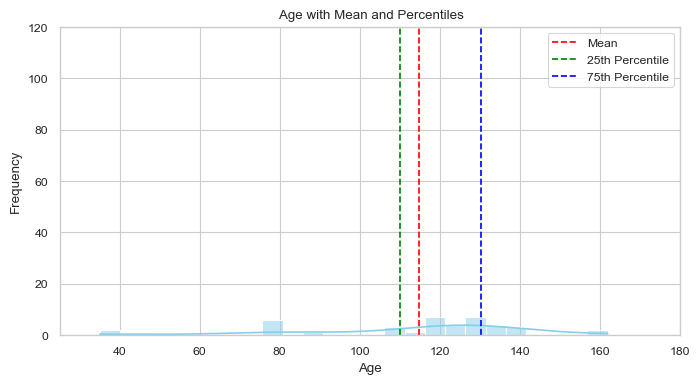

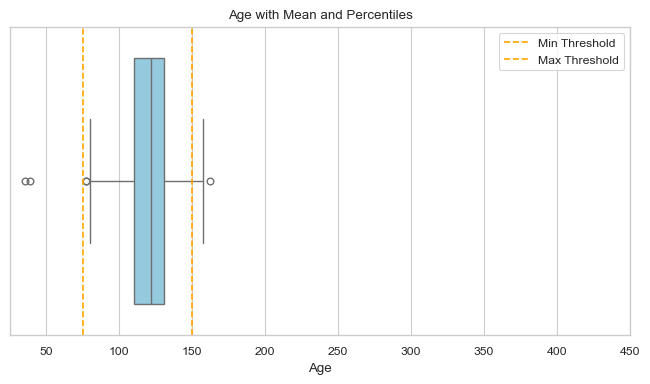

In [157]:

import re

# Define a function to extract numeric values 
def extract_numeric(value):
    # Check if the value contains '<' or '>'
    if '<' in str(value):
        return None
    elif '>' in str(value):
        return None
    else:
        # Extract numeric values from the string
        numeric_values = re.findall(r'\d+\.\d+|\d+', str(value))
        return float(numeric_values[0]) if numeric_values else None

# Apply the function to the 'leeftijd' column
ARKDSS_cleaned['leeftijd'] = ARKDSS_cleaned['leeftijd'].apply(extract_numeric)

# Show info of unique values in the 'leeftijd' column
unique_values_info = ARKDSS_cleaned['leeftijd'].value_counts()
print(unique_values_info)

# Print basic statistics
print("Basic Statistics for 'leeftijd' column:")
print(ARKDSS_cleaned['leeftijd'].describe())

# Calculate 25th and 75th percentiles
percentile_25 = ARKDSS_cleaned['leeftijd'].quantile(0.25)
percentile_75 = ARKDSS_cleaned['leeftijd'].quantile(0.75)

# Plot histogram with mean and percentiles
plt.figure(figsize=(8, 4))
sns.histplot(ARKDSS_cleaned['leeftijd'], kde=True, color='skyblue', binwidth=5)
plt.axvline(x=ARKDSS_cleaned['leeftijd'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=percentile_25, color='green', linestyle='--', label='25th Percentile')
plt.axvline(x=percentile_75, color='blue', linestyle='--', label='75th Percentile')
plt.title(' Age with Mean and Percentiles')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(25, 180)
plt.ylim(0, 120)
plt.legend()
plt.savefig('age_with_mean_and_percentiles.png')
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define thresholds
min_threshold = 75
max_threshold = 150

# Plot boxplot with mean, thresholds, and percentiles
plt.figure(figsize=(8, 4))
sns.boxplot(x='leeftijd', data=ARKDSS_cleaned, color='skyblue', whis=1.5)
plt.axvline(x=min_threshold, color='orange', linestyle='--', label='Min Threshold')
plt.axvline(x=max_threshold, color='orange', linestyle='--', label='Max Threshold')


plt.title('Age with Mean and Percentiles')
plt.xlabel('Age')
plt.xlim(25, 450)
plt.legend()
plt.savefig('boxplot_age_with_mean_and_percentiles.png')
plt.show()




In [158]:
from scipy.stats import weibull_min

B = 3.0  # Vormparameter
lambda_ = 75  # Schaalparameter 

# Bereken de kans op falen na 10 jaar
t = 1  # Tijd in jaren
cdf_10_years = weibull_min.cdf(t, B, scale=lambda_)

print("CDF voor 10 jaar:", cdf_10_years)


CDF voor 10 jaar: 2.3703675610447447e-06


Basic Statistics for 'leeftijd' column after removing outliers:
count     36.000000
mean     116.694444
std       19.551864
min       77.000000
25%      110.000000
50%      121.500000
75%      130.000000
max      141.000000
Name: leeftijd, dtype: float64


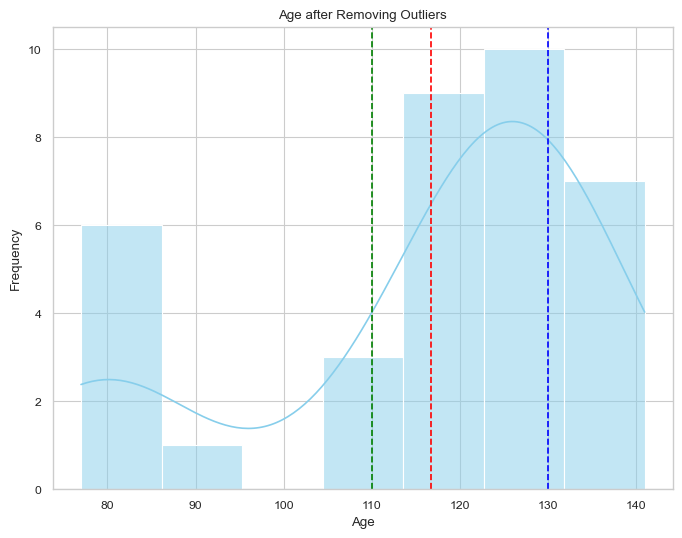

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define thresholds for outliers
min_threshold = 75  # Minimum age threshold
max_threshold = 150  # Maximum age threshold

# Remove outliers from the dataset
ARKDSSCD = ARKDSS_cleaned[(ARKDSS_cleaned['leeftijd'] >= min_threshold) & (ARKDSS_cleaned['leeftijd'] <= max_threshold)]

# Print basic statistics for the cleaned dataset
print("Basic Statistics for 'leeftijd' column after removing outliers:")
print(ARKDSSCD['leeftijd'].describe())
percentile_25 = ARKDSSCD['leeftijd'].quantile(0.25)
percentile_75 = ARKDSSCD['leeftijd'].quantile(0.75)

# Plot histogram for 'leeftijd' column 
plt.figure(figsize=(8, 6))
sns.histplot(ARKDSSCD['leeftijd'], kde=True, color='skyblue')
plt.axvline(x=ARKDSSCD['leeftijd'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=percentile_25, color='green', linestyle='--', label='25th Percentile')
plt.axvline(x=percentile_75, color='blue', linestyle='--', label='75th Percentile')
plt.title('Age after Removing Outliers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('histogram_age_after_removing_outliers.png')  
plt.show()



C:\Users\kenter013\AppData\Local\Temp\ipykernel_30608\2582554497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ARKDSSCD['lengte GIS'] = pd.to_numeric(ARKDSSCD['lengte GIS'], errors='coerce')


Basic Statistics:
count     36.000000
mean      58.816667
std       52.189986
min       10.340000
25%       21.560000
50%       41.170000
75%       72.297500
max      194.000000
Name: lengte GIS, dtype: float64


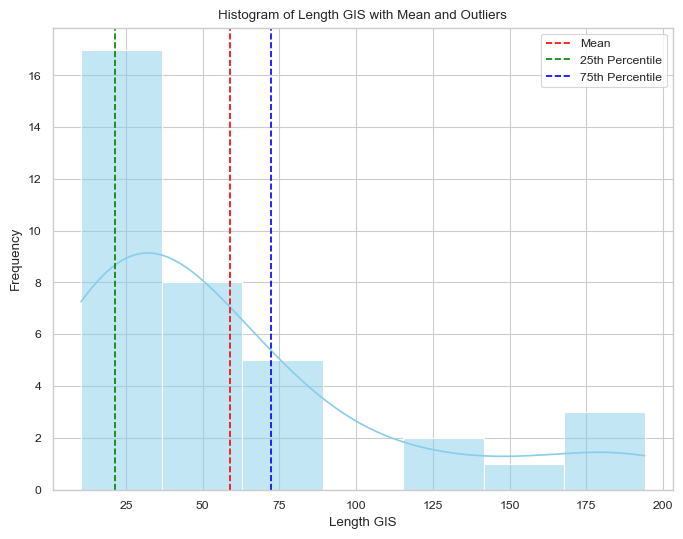

C:\Users\kenter013\AppData\Local\Temp\ipykernel_30608\2582554497.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ARKDSSCD['lengte GIS'] = pd.to_numeric(ARKDSSCD['lengte GIS'], errors='coerce')


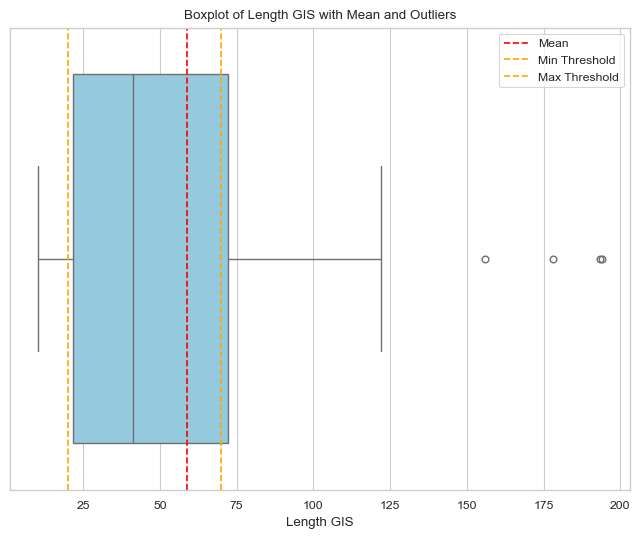

In [160]:
# Convert 'lengte GIS' column to numeric 
ARKDSSCD['lengte GIS'] = pd.to_numeric(ARKDSSCD['lengte GIS'], errors='coerce')

print("Basic Statistics:")
print(ARKDSSCD['lengte GIS'].describe())

# Calculate 25th and 75th percentiles
percentile_25 = ARKDSSCD['lengte GIS'].quantile(0.25)
percentile_75 = ARKDSSCD['lengte GIS'].quantile(0.75)

# Plot histogram with mean and outliers
plt.figure(figsize=(8, 6))
sns.histplot(ARKDSSCD['lengte GIS'], kde=True, color='skyblue')
plt.axvline(x=ARKDSSCD['lengte GIS'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=percentile_25, color='green', linestyle='--', label='25th Percentile')
plt.axvline(x=percentile_75, color='blue', linestyle='--', label='75th Percentile')

plt.title('Histogram of Length GIS with Mean and Outliers')
plt.xlabel('Length GIS')
plt.ylabel('Frequency')
plt.legend()
# Save the plot as a PNG file
plt.savefig('histogram_length_GIS.png')

# Show the plot
plt.show()

# Convert 'lengte GIS' column to numeric, (coercing errors to NaN)
ARKDSSCD['lengte GIS'] = pd.to_numeric(ARKDSSCD['lengte GIS'], errors='coerce')

# Define thresholds
min_threshold = 20
max_threshold = 70

# Plot boxplot with mean and thresholds
plt.figure(figsize=(8, 6))
sns.boxplot(x='lengte GIS', data=ARKDSSCD, color='skyblue')
plt.axvline(x=ARKDSSCD['lengte GIS'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=min_threshold, color='orange', linestyle='--', label='Min Threshold')
plt.axvline(x=max_threshold, color='orange', linestyle='--', label='Max Threshold')

plt.title('Boxplot of Length GIS with Mean and Outliers')
plt.xlabel('Length GIS')
plt.legend()

# Save and plotting
plt.savefig('boxplot_length_GIS.png')
plt.show()

Basic Statistics for 'lengte GIS' column after removing outliers:
count    19.000000
mean     38.583684
std      15.086612
min      20.500000
25%      25.685000
50%      35.500000
75%      51.500000
max      68.000000
Name: lengte GIS, dtype: float64


C:\Users\kenter013\AppData\Local\Temp\ipykernel_30608\1339322959.py:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


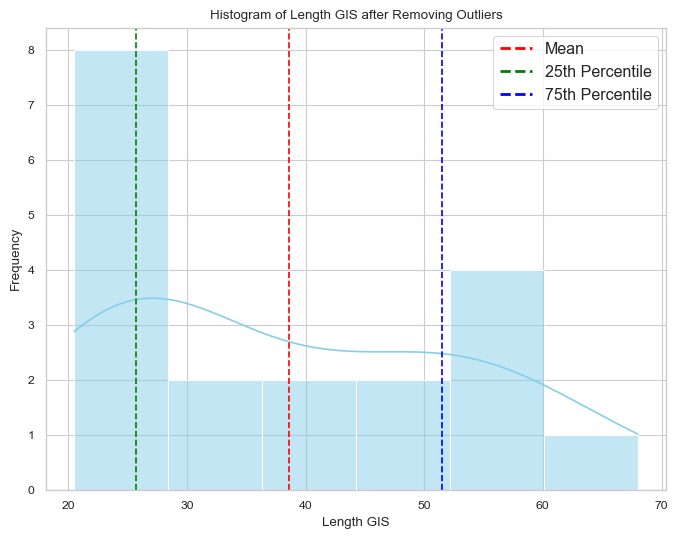

Index(['Quaywall nr', 'onderbouw materiaal', 'fundatie materiaal',
       'bovenbouw materiaal', 'maximale verplaatsingssnelheid hor (mm/mnd)',
       'maximale verplaatsingssnelheid vert (mm/mnd)', 'leeftijd',
       'lengte GIS', 'geometrie', 'rak', 'rakdeel', 'aantasting houten palen',
       'aantasting houten palen score1', 'beschadigde kesp',
       'beschadigde kesp score3', 'beschadigde paal-kesp/paal-vloer',
       'paal-kesp/paal-vloer score4', 'risicoscore specialist'],
      dtype='object')


In [161]:

min_threshold = 20 # Minimum length threshold
max_threshold = 70 # Maximum length threshold

# Remove outliers from the dataset
ARKDSSCDD = ARKDSSCD[(ARKDSSCD['lengte GIS'] >= min_threshold) & (ARKDSSCD['lengte GIS'] <= max_threshold)]

# Print basic statistics for the cleaned dataset
print("Basic Statistics for 'lengte GIS' column after removing outliers:")
print(ARKDSSCDD['lengte GIS'].describe())

# Calculate 25th and 75th percentiles for cleaned dataset
percentile_25 = ARKDSSCDD['lengte GIS'].quantile(0.25)
percentile_75 = ARKDSSCDD['lengte GIS'].quantile(0.75)

# Plot histogram for 'lengte GIS' column after removing outliers
plt.figure(figsize=(8, 6))
sns.histplot(ARKDSSCDD['lengte GIS'], kde=True, color='skyblue')
plt.axvline(x=ARKDSSCDD['lengte GIS'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=percentile_25, color='green', linestyle='--', label='25th Percentile')
plt.axvline(x=percentile_75, color='blue', linestyle='--', label='75th Percentile')
plt.title('Histogram of Length GIS after Removing Outliers')
plt.xlabel('Length GIS')
plt.ylabel('Frequency')

legend = plt.legend(loc='upper right', fontsize='large')
for handle in legend.legendHandles:
    handle.set_linewidth(2.0)  # Increase handle line width

plt.savefig('histogram_length_GIS_after_removing_outliers.png')  # Save histogram figure

# Save cleaned dataset as CSV 
ARKDSSCDD.to_csv('cleaned_data.csv', index=False)

plt.show()

print(ARKDSSCDD.columns)


       maximale verplaatsingssnelheid hor (mm/mnd)  \
count                                    19.000000   
mean                                      0.645813   
std                                       0.369100   
min                                       0.083333   
25%                                       0.322628   
50%                                       0.636364   
75%                                       0.863636   
max                                       1.363636   

       maximale verplaatsingssnelheid vert (mm/mnd)    leeftijd  lengte GIS  \
count                                     19.000000   19.000000   19.000000   
mean                                       0.283213  110.631579   38.583684   
std                                        0.227559   21.659513   15.086612   
min                                        0.062745   77.000000   20.500000   
25%                                        0.140625   85.000000   25.685000   
50%                                    

<Figure size 2000x1800 with 0 Axes>

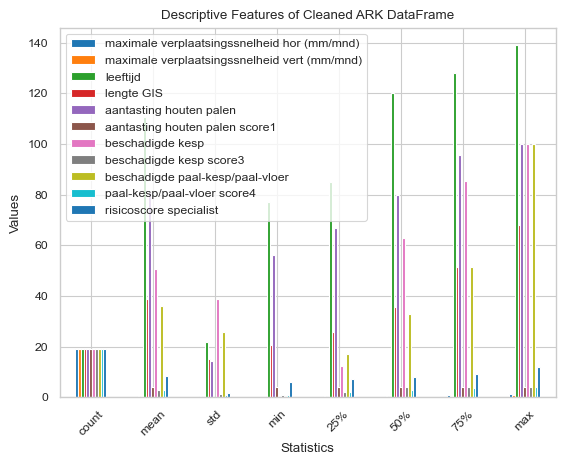

In [162]:

# Analyzing features of the DataFrame
description = ARKDSSCDD.describe()
print(description)


plt.figure(figsize=(20, 18))  
ax = description.plot(kind='bar')  
plt.title('Descriptive Features of Cleaned ARK DataFrame') 
plt.xlabel('Statistics')  
plt.ylabel('Values')  
plt.xticks(rotation=45)  
plt.savefig('ARKDSSDD_Cleaned.describe.png')  
plt.show() 

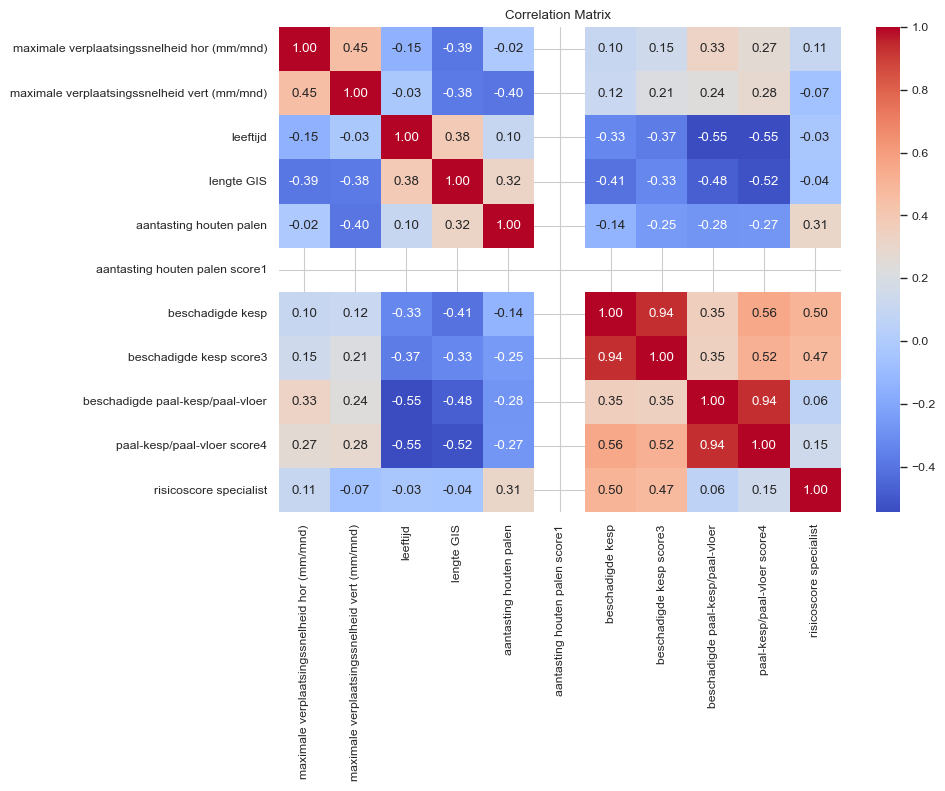

In [163]:
# Drop uneccesary parameters
ARKDSSC_filtered = ARKDSSCDD.drop(columns=['Quaywall nr','geometrie','rak','rakdeel', 'onderbouw materiaal',
 'bovenbouw materiaal','fundatie materiaal',])

#heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(ARKDSSC_filtered.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix ')
plt.tight_layout()
heatmap_filename = 'correlation_heatmap.png'
plt.savefig(heatmap_filename)
plt.show()




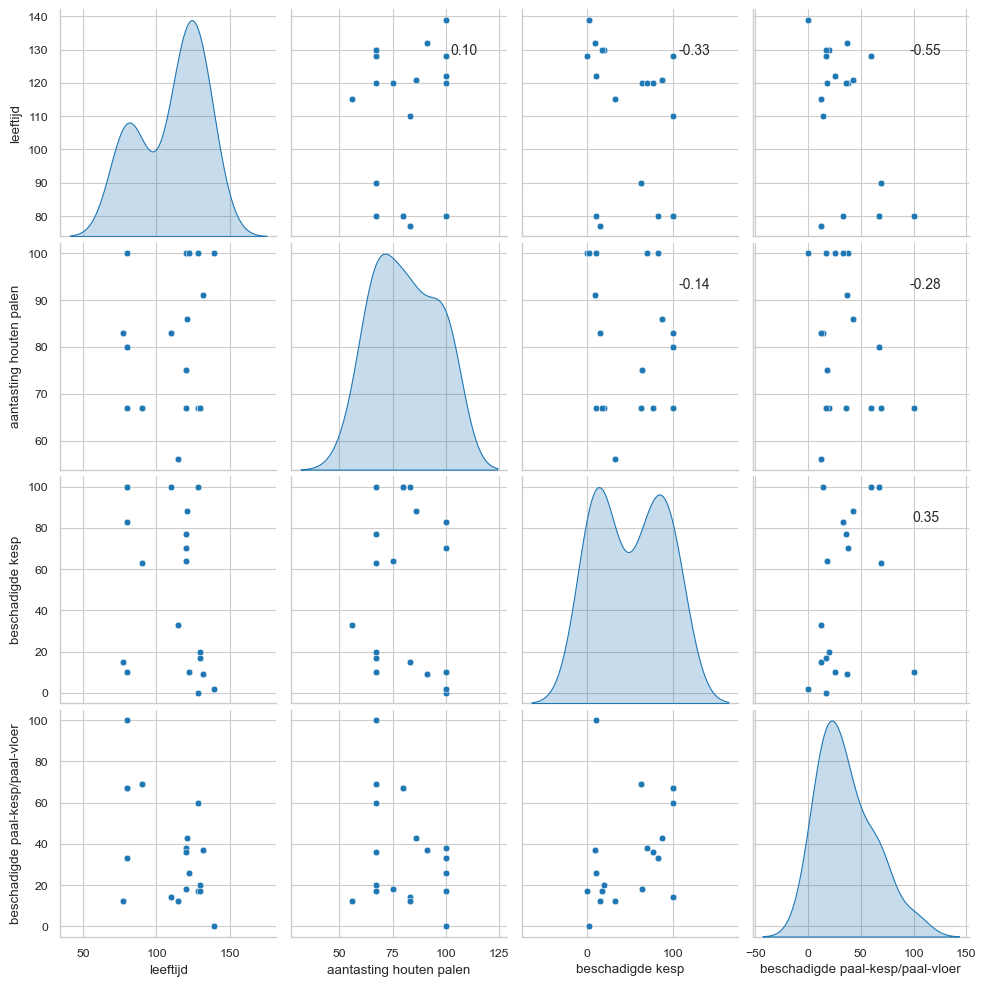

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecteer de relevante kolommen
selected_columns = ['leeftijd', 'aantasting houten palen', 'beschadigde kesp', 'beschadigde paal-kesp/paal-vloer']

# Maak een pairplot met scatterplots, kde-plots en histogrammen
pair_plot = sns.pairplot(ARKDSSCDD[selected_columns], diag_kind='kde', kind='scatter')

# Voeg correlatiecoëfficiënten toe aan de bovenhoek
corr_values = ARKDSSCDD[selected_columns].corr()
for i, j in zip(*plt.np.triu_indices_from(pair_plot.axes, 1)):
    pair_plot.axes[i, j].annotate(f"{corr_values.iloc[i, j]:.2f}",
                                  (0.8, 0.8),
                                  xycoords='axes fraction',
                                  ha='center',
                                  fontsize=10)
plt.savefig('pairplot small.png')
plt.show()




In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define thresholds for deformation speeds (in mm/month)
red_threshold = 2.0  # Speed > 2.0 mm/month
orange_threshold = (1.0, 2.0)  # Speed between 1.0 and 2.0 mm/month
yellow_threshold = (0.5, 1.0)  # Speed between 0.5 and 1.0 mm/month
green_threshold = 0.5  # Speed <= 0.5 mm/month

# Function to categorize deformation speed
def categorize_speed(speed):  
    if speed > red_threshold:
        return 'red'
    elif orange_threshold[0] <= speed <= orange_threshold[1]:
        return 'orange'
    elif yellow_threshold[0] <= speed <= yellow_threshold[1]:
        return 'yellow'
    else:
        return 'green'

# Replace 'Hout' variations in the 'onderbouw materiaal' column (if needed)
ARKD['onderbouw materiaal'] = ARKD['onderbouw materiaal'].replace({'onderbouw hout': 'Hout', 'Hout': 'Hout'})

# Filter out rows where 'onderbouw materiaal' is 'hout' (with a lowercase 'h')
ARKD = ARKD[ARKD['onderbouw materiaal'] != 'hout']

# Apply categorization function for both horizontal and vertical deformation speeds
ARKD['hor_speed_category'] = ARKD['maximale verplaatsingssnelheid hor (mm/mnd)'].apply(categorize_speed)
ARKD['vert_speed_category'] = ARKD['maximale verplaatsingssnelheid vert (mm/mnd)'].apply(categorize_speed)

# Step 1: Foundation Material vs Horizontal Deformation Speed
plt.figure(figsize=(12, 6))
sns.scatterplot(x='fundatie materiaal', 
                y='maximale verplaatsingssnelheid hor (mm/mnd)', 
                data=ARKD, 
                hue='hor_speed_category', 
                palette={'red': 'red', 'orange': 'orange', 'yellow': 'yellow', 'green': 'green'}, 
                s=100, marker='o', edgecolor='black')
plt.title('Foundation Material vs Horizontal Deformation Speed')
plt.xlabel('Foundation Material')
plt.ylabel('Horizontal Deformation Speed (mm/month)')
plt.xticks(rotation=45)
plt.legend(title="Deformation Speed Category")
plt.grid(True)
plt.savefig('Foundation_vs_Horizontal.png')  # Save the figure as a PNG file
plt.show()
plt.close()

# Step 2: Foundation Material vs Vertical Deformation Speed
plt.figure(figsize=(12, 6))
sns.scatterplot(x='fundatie materiaal', 
                y='maximale verplaatsingssnelheid vert (mm/mnd)', 
                data=ARKD, 
                hue='vert_speed_category', 
                palette={'red': 'red', 'orange': 'orange', 'yellow': 'yellow', 'green': 'green'}, 
                s=100, marker='o', edgecolor='black')
plt.title('Foundation Material vs Vertical Deformation Speed')
plt.xlabel('Foundation Material')
plt.ylabel('Vertical Deformation Speed (mm/month)')
plt.xticks(rotation=45)
plt.legend(title="Deformation Speed Category")
plt.grid(True)
plt.savefig('Foundation_vs_Vertical.png')  # Save the figure as a PNG file
plt.show()
plt.close()

# Step 3: Understructure Material vs Horizontal Deformation Speed
plt.figure(figsize=(12, 6))
sns.scatterplot(x='onderbouw materiaal', 
                y='maximale verplaatsingssnelheid hor (mm/mnd)', 
                data=ARKD, 
                hue='hor_speed_category', 
                palette={'red': 'red', 'orange': 'orange', 'yellow': 'yellow', 'green': 'green'}, 
                s=100, marker='o', edgecolor='black')
plt.title('Understructure Material vs Horizontal Deformation Speed')
plt.xlabel('Understructure Material')
plt.ylabel('Horizontal Deformation Speed (mm/month)')
plt.xticks(rotation=45)
plt.legend(title="Deformation Speed Category")
plt.grid(True)
plt.savefig('Understructure_vs_Horizontal.png')  # Save the figure as a PNG file
plt.show()
plt.close()

# Step 4: Understructure Material vs Vertical Deformation Speed
plt.figure(figsize=(12, 6))
sns.scatterplot(x='onderbouw materiaal', 
                y='maximale verplaatsingssnelheid vert (mm/mnd)', 
                data=ARKD, 
                hue='vert_speed_category', 
                palette={'red': 'red', 'orange': 'orange', 'yellow': 'yellow', 'green': 'green'}, 
                s=100, marker='o', edgecolor='black')
plt.title('Understructure Material vs Vertical Deformation Speed')
plt.xlabel('Understructure Material')
plt.ylabel('Vertical Deformation Speed (mm/month)')
plt.xticks(rotation=45)
plt.legend(title="Deformation Speed Category")
plt.grid(True)
plt.savefig('Understructure_vs_Vertical.png')  # Save the figure as a PNG file
plt.show()
plt.close()


NameError: name 'ARKD' is not defined